<a href="https://colab.research.google.com/github/superpanditas/Quinio/blob/main/Weekly_SKU_level_Product_Sales_Transactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Load the data
data = pd.read_csv('/content/Productlevel_Sales_Transactions_Dataset_Weekly.csv')
# Print data
data.head()

,Scode,Pcode,Price,Wk0,Wk1,Wk2,Wk3,Wk4,Wk5,Wk6,...,Wk96,Wk97,Wk98,Wk99,Wk100,Wk101,Wk102,Wk103,Unnamed: 107,94
0,Store1,SKU1,$24.00,23,48,47,42,22,29,47,...,33,40,125,133,229,381,21,31,NaN,NaN
1,Store1,SKU2,$63.00,23,22,25,40,32,26,30,...,25,50,75,95,231,590,25,33,NaN,NaN
2,Store1,SKU3,$93.00,7,11,8,9,10,8,7,...,13,30,67,188,267,330,35,33,NaN,NaN
3,Store1,SKU4,$48.00,50,31,50,33,26,27,42,...,26,23,92,126,205,357,30,34,NaN,NaN
4,Store1,SKU5,$62.00,8,5,13,11,6,7,9,...,15,21,93,243,710,1872,33,10,NaN,NaN


In [27]:
# info about DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Columns: 109 entries, Scode to 94
dtypes: float64(2), int64(104), object(3)
memory usage: 5.0+ MB


In [28]:
print('Number of Stores:', data['Scode'].nunique())

Number of Stores: 5


In [29]:
# How many products are for each store?
count_products_by_store = data[['Scode', 'Pcode']]
print(count_products_by_store['Scode'].value_counts())

Store4    1500
Store5    1500
Store1    1000
Store2    1000
Store3    1000
Name: Scode, dtype: int64


In [30]:
# Frequenthly of products
count_products = data['Pcode'].value_counts()
count_products = count_products.to_frame()
count_products = count_products.reset_index()
#print(count_products.sort_values(by='Pcode', ascending=False))

# The number of products that are repeated x times
freq_products = count_products.groupby('Pcode')['index'].count()
print(freq_products)

Pcode
1     506
2     324
3     309
4     252
5     192
6     107
7      78
8      48
9      19
10     14
11      4
12      2
Name: index, dtype: int64


In [31]:
# dtypes of all columns
#print(data.dtypes)

# Function to remove non-numeric values and convert string to float
def convert_value(string_value):
  if isinstance(string_value, (int, float)):
    return string_value
  string_value = ''.join(s for s in string_value if s.isdigit() or s in ['.', ','])
  return float(string_value)

data['Price'] = data['Price'].apply(lambda x: convert_value(x))

In [32]:
# Eliminate columns "Unnamed: 107" and "94" because have null values in all rows
data = data.drop(['Unnamed: 107', '94'], axis=1)

# Change week columns by dates to manage more easily data
# Init dates by Mondays
start_date = '2022-01-03'

dates = pd.date_range(start=start_date, periods=104, freq='7D')
data.rename(columns=dict(zip(data.loc[:, ~data.columns.isin(['Scode', 'Pcode', 'Price'])].columns, dates)), inplace=True)

data.head()

,Scode,Pcode,Price,2022-01-03 00:00:00,2022-01-10 00:00:00,2022-01-17 00:00:00,2022-01-24 00:00:00,2022-01-31 00:00:00,2022-02-07 00:00:00,2022-02-14 00:00:00,...,2023-10-23 00:00:00,2023-10-30 00:00:00,2023-11-06 00:00:00,2023-11-13 00:00:00,2023-11-20 00:00:00,2023-11-27 00:00:00,2023-12-04 00:00:00,2023-12-11 00:00:00,2023-12-18 00:00:00,2023-12-25 00:00:00
0,Store1,SKU1,24.0,23,48,47,42,22,29,47,...,31,37,33,40,125,133,229,381,21,31
1,Store1,SKU2,63.0,23,22,25,40,32,26,30,...,20,20,25,50,75,95,231,590,25,33
2,Store1,SKU3,93.0,7,11,8,9,10,8,7,...,9,17,13,30,67,188,267,330,35,33
3,Store1,SKU4,48.0,50,31,50,33,26,27,42,...,31,23,26,23,92,126,205,357,30,34
4,Store1,SKU5,62.0,8,5,13,11,6,7,9,...,19,9,15,21,93,243,710,1872,33,10


##### Some insights 

*   November and December are the highest months on sales and its values are high compared to all the rest points
*   Except for temporalities almost all graphs are flat and store 1 have a trend up



Stats Stores before do changes:              mean        std      min        max
Scode                                           
Store1   36910.86   74254.49  15696.0   600418.0
Store2  102784.80  235070.42  48045.0  1606515.0
Store3  124970.72  228530.06  73230.0  1574098.0
Store4   91578.05  176397.90  51693.0  1214483.0
Store5   92136.11  178499.34  51722.0  1228985.0
Stats Stores after do changes:             mean       std      min        max
Scode                                         
Store1  22196.65   5973.33  15696.0   47764.00
Store2  54133.32  14143.05  48045.0  102784.80
Store3  78286.74  13547.39  73230.0  124970.72
Store4  55450.19  10485.52  51693.0   91578.05
Store5  55590.84  10605.99  51722.0   92136.11


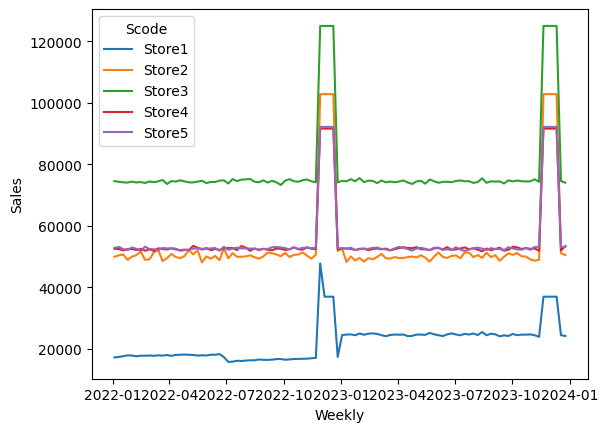

In [11]:
data_stores = data.copy()

data_stores = data_stores.drop(['Pcode', 'Price'], axis=1)
data_stores_sum = data_stores.groupby('Scode').agg('sum')
#data_stores_sum = data_stores_sum.reset_index()

# function to calculate mean and std by row on dataframe
def calculate_stats(row):
  mean = row.mean()
  std = row.std()
  min = row.min()
  max = row.max()
  return pd.Series({'mean': mean, 'std': std, 'min': min, 'max': max})

# get stats from data_stores_sum
b_stats_stores = data_stores_sum.apply(calculate_stats, axis=1)

# Print Stats before do changes
print('Stats Stores before do changes:', b_stats_stores.round(2))

# function to replace outliers according to a condition 
def replace_outliers(row, columns, umbral=0.3):
    mean = row.mean()
    std = row.std()
    result = np.where(np.abs(row - mean) > umbral * std, mean, row)
    return pd.Series(result, index=columns)     

# Columns
columns = data_stores_sum.columns

# Apply to dataframe call data_stores_sum
data_stores_adj = data_stores_sum.apply(lambda row: replace_outliers(row, columns), axis=1)

# Print Stats after do changes
a_stats_stores = data_stores_adj.apply(calculate_stats, axis=1)
print('Stats Stores after do changes:', a_stats_stores.round(2))


data_stores_adj = data_stores_adj.reset_index()
# Convert columns to variables 
data_stores_melted = pd.melt(data_stores_adj, id_vars='Scode', var_name='Weekly', value_name='Sales')
#print(data_stores_melted)


# Visualize data
sns.lineplot(x='Weekly', y='Sales', hue='Scode', data=data_stores_melted)
plt.show()


In [12]:
# get each store data 
store1 = data.loc[data['Scode'] == 'Store1']
store2 = data.loc[data['Scode'] == 'Store2']
store3 = data.loc[data['Scode'] == 'Store3']
store4 = data.loc[data['Scode'] == 'Store4']
store5 = data.loc[data['Scode'] == 'Store5']

### **Analyzing data from Store 1**

In [13]:
#Store1
#store1 = data.loc[data['Scode'] == 'Store1']
store1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Columns: 107 entries, Scode to 2023-12-25 00:00:00
dtypes: float64(1), int64(104), object(2)
memory usage: 843.8+ KB


In [14]:
print(store1.shape)
store1.head()

(1000, 107)


,Scode,Pcode,Price,2022-01-03 00:00:00,2022-01-10 00:00:00,2022-01-17 00:00:00,2022-01-24 00:00:00,2022-01-31 00:00:00,2022-02-07 00:00:00,2022-02-14 00:00:00,...,2023-10-23 00:00:00,2023-10-30 00:00:00,2023-11-06 00:00:00,2023-11-13 00:00:00,2023-11-20 00:00:00,2023-11-27 00:00:00,2023-12-04 00:00:00,2023-12-11 00:00:00,2023-12-18 00:00:00,2023-12-25 00:00:00
0,Store1,SKU1,24.0,23,48,47,42,22,29,47,...,31,37,33,40,125,133,229,381,21,31
1,Store1,SKU2,63.0,23,22,25,40,32,26,30,...,20,20,25,50,75,95,231,590,25,33
2,Store1,SKU3,93.0,7,11,8,9,10,8,7,...,9,17,13,30,67,188,267,330,35,33
3,Store1,SKU4,48.0,50,31,50,33,26,27,42,...,31,23,26,23,92,126,205,357,30,34
4,Store1,SKU5,62.0,8,5,13,11,6,7,9,...,19,9,15,21,93,243,710,1872,33,10


##### Understanding the distribution of variable called price
##### It looks like good distribution with same quantity of products for each bins of size 10, slightly more in products with more highers prices 

In [15]:
s1_price = store1['Price']
s1_price.describe()

count    1000.000000
mean       55.919000
std        27.140985
min        10.000000
25%        32.000000
50%        56.000000
75%        80.000000
max       100.000000
Name: Price, dtype: float64

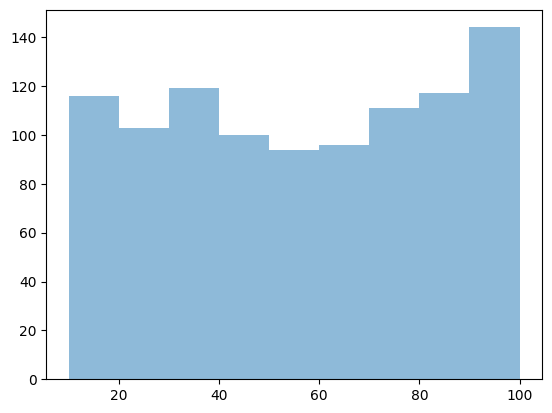

In [16]:
# Distribution of prices
s1_price = s1_price.to_frame()
s1_price_sorted = s1_price.sort_values('Price')

plt.hist(s1_price_sorted, bins=np.arange(10,110,10), alpha=0.5)
plt.show()

##### Observe some stats by each SKU before change outliers by mean

In [17]:
# Grouping by SKUs
data_skus1 = store1.drop(['Price'], axis=1)
data_skus1_sum = data_skus1.groupby(['Scode', 'Pcode']).agg('sum')

# get stats for each SKUs
b_stats_skus1 = data_skus1_sum.apply(calculate_stats, axis=1).round(1)

# Print stats
print('-----------------------------------------------------------------------------------------')
print('The top 3 SKUs with highest week sales:') 
print(b_stats_skus1.sort_values('max', ascending=False).head(3))
print('-----------------------------------------------------------------------------------------')
print('The top 3 SKUs with lowest week sales:') 
print(b_stats_skus1.sort_values('min', ascending=True).head(3))
print('-----------------------------------------------------------------------------------------')
print('The top 3 SKUs with highest std:') 
print(b_stats_skus1.sort_values('std', ascending=False).head(3))
print('-----------------------------------------------------------------------------------------')
print('The top 3 SKUs with lowest std:') 
print(b_stats_skus1.sort_values('std', ascending=True).head(3))
print('-----------------------------------------------------------------------------------------')
print('The top 3 SKUs with highest mean:') 
print(b_stats_skus1.sort_values('mean', ascending=False).head(3))
print('-----------------------------------------------------------------------------------------')
print('The top 3 SKUs with lowest mean:') 
print(b_stats_skus1.sort_values('mean', ascending=True).head(3))
print('-----------------------------------------------------------------------------------------')

-----------------------------------------------------------------------------------------
The top 3 SKUs with highest week sales:
                mean    std   min     max
Scode  Pcode                             
Store1 SKU909  117.2  347.9  50.0  3299.0
       SKU963  106.8  327.6  50.0  3196.0
       SKU950  108.6  300.1  50.0  2834.0
-----------------------------------------------------------------------------------------
The top 3 SKUs with lowest week sales:
               mean    std  min    max
Scode  Pcode                          
Store1 SKU832  42.1  107.5  0.0  933.0
       SKU378  14.2   31.4  0.0  252.0
       SKU377  24.1  103.3  0.0  995.0
-----------------------------------------------------------------------------------------
The top 3 SKUs with highest std:
                mean    std   min     max
Scode  Pcode                             
Store1 SKU909  117.2  347.9  50.0  3299.0
       SKU963  106.8  327.6  50.0  3196.0
       SKU988  113.1  301.4  50.0  2756.0
---

##### Plotting Trend

<ipython-input-18-7e5d3e133590>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_1_skus_agg = data_skus1_melted.groupby('Weekly').agg('sum')


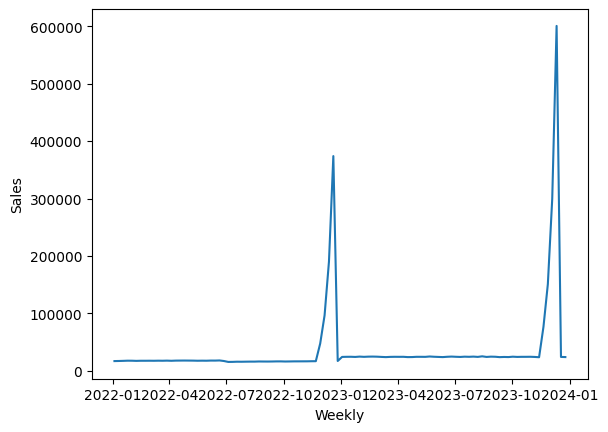

In [18]:
data_skus1_sum = data_skus1_sum.reset_index()
data_skus1_temp = data_skus1_sum.drop('Pcode', axis=1)
data_skus1_melted = pd.melt(data_skus1_temp, id_vars='Scode', var_name='Weekly', value_name='Sales')
#print(data_skus1_melted)


#data_1_skus = data_skus1_melted.drop('Pcode', axis=1)
data_1_skus_agg = data_skus1_melted.groupby('Weekly').agg('sum')
data_1_skus_agg = data_1_skus_agg.reset_index()
#print(data_1_skus_agg)

# Visualize Data
sns.lineplot(x='Weekly', y='Sales', data=data_1_skus_agg)
plt.show()


In [19]:
data_skus1_sum = data_skus1_sum.set_index(['Scode', 'Pcode'])
columns_skus1 = data_skus1_sum.columns

data_skus1_adj = data_skus1_sum.apply(lambda row: replace_outliers(row, columns_skus1), axis=1)

a_stats_skus1 = data_skus1_adj.apply(calculate_stats, axis=1).round(1)

# Print stats
print('-----------------------------------------------------------------------------------------')
print('The top 3 SKUs with highest week sales:') 
print(a_stats_skus1.sort_values('max', ascending=False).head(3))
print('-----------------------------------------------------------------------------------------')
print('The top 3 SKUs with lowest week sales:') 
print(a_stats_skus1.sort_values('min', ascending=True).head(3))
print('-----------------------------------------------------------------------------------------')
print('The top 3 SKUs with highest std:') 
print(a_stats_skus1.sort_values('std', ascending=False).head(3))
print('-----------------------------------------------------------------------------------------')
print('The top 3 SKUs with lowest std:') 
print(a_stats_skus1.sort_values('std', ascending=True).head(3))
print('-----------------------------------------------------------------------------------------')
print('The top 3 SKUs with highest mean:') 
print(a_stats_skus1.sort_values('mean', ascending=False).head(3))
print('-----------------------------------------------------------------------------------------')
print('The top 3 SKUs with lowest mean:') 
print(a_stats_skus1.sort_values('mean', ascending=True).head(3))
print('-----------------------------------------------------------------------------------------')

-----------------------------------------------------------------------------------------
The top 3 SKUs with highest week sales:
               mean   std   min    max
Scode  Pcode                          
Store1 SKU909  60.9  21.0  50.0  178.0
       SKU988  60.7  20.6  50.0  173.0
       SKU949  60.6  18.9  50.0  172.0
-----------------------------------------------------------------------------------------
The top 3 SKUs with lowest week sales:
               mean   std  min   max
Scode  Pcode                        
Store1 SKU226  10.1  11.6  0.0  35.0
       SKU712   9.1  10.8  0.0  35.0
       SKU672  10.9  11.8  0.0  35.0
-----------------------------------------------------------------------------------------
The top 3 SKUs with highest std:
               mean   std   min    max
Scode  Pcode                          
Store1 SKU89   30.9  22.0   1.0  149.0
       SKU909  60.9  21.0  50.0  178.0
       SKU184  32.8  20.8   1.0  142.0
-------------------------------------------

### Plotting Trend after change outliers by mean

<ipython-input-20-eda67dc4f63e>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_1_skus_agg = data_skus1_melted_adj.groupby('Weekly').agg('sum')


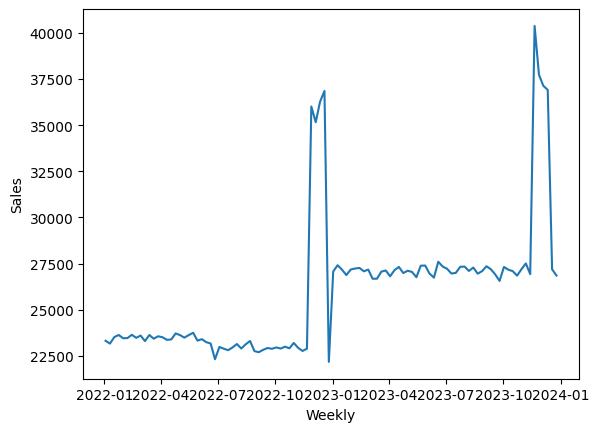

In [20]:
data_skus1_adj = data_skus1_adj.reset_index()
data_skus1_adj_temp = data_skus1_adj.drop('Pcode', axis=1)

data_skus1_melted_adj = pd.melt(data_skus1_adj_temp, id_vars='Scode', var_name='Weekly', value_name='Sales')

#data_1_skus = data_skus1_melted.drop('Pcode', axis=1)
data_1_skus_agg = data_skus1_melted_adj.groupby('Weekly').agg('sum')
data_1_skus_agg = data_1_skus_agg.reset_index()
#print(data_1_skus_agg)

# Visualize data
sns.lineplot(data_1_skus_agg, x='Weekly', y='Sales')
plt.show()

#####The objective in this part is understand in detail the time series and get some insights. Use the clasic descomposition in 3 phases that are trend, seasonality and residuals.


Observe that exist a trend up in the general data althought in some periods exists trends down. In the months of November and December are the better months of year and note that after this months the trend does not have changes abruts.And the resudual is flat then all info is capture between trend and seasonalities.

               Sales
Weekly              
2022-01-03  23323.41
2022-01-10  23169.11
2022-01-17  23522.03
2022-01-24  23637.42
2022-01-31  23459.91
...              ...
2023-11-27  37728.62
2023-12-04  37128.43
2023-12-11  36910.86
2023-12-18  27192.56
2023-12-25  26854.79

[104 rows x 1 columns]


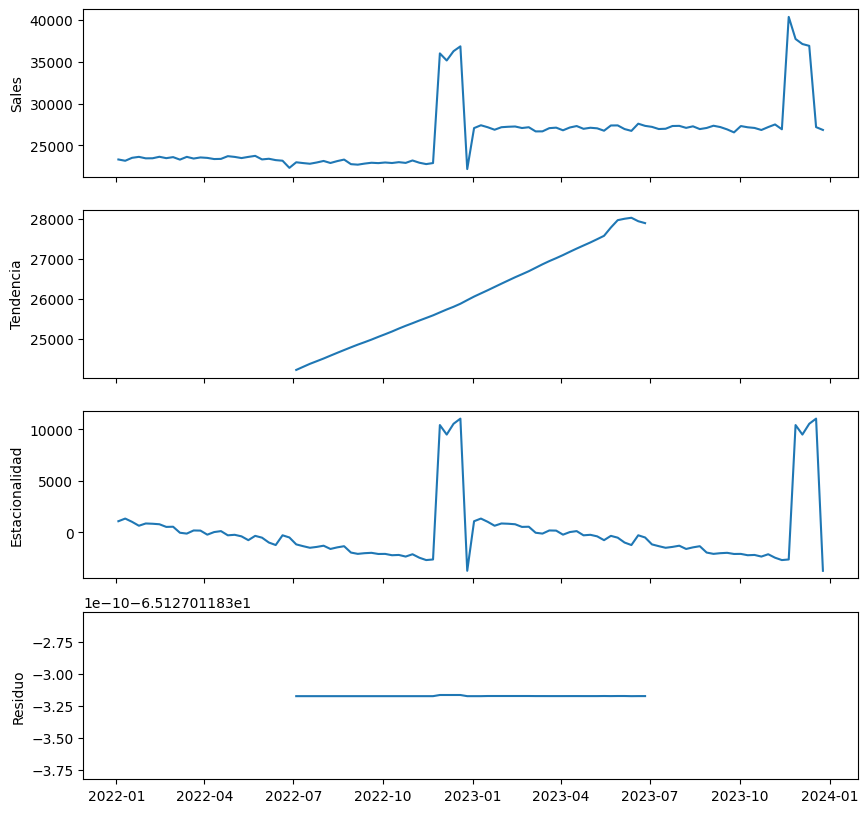

In [21]:
# Review of seasonality, cyclicality and trend of the general data of store 1 through a decomposition of the time series ... 
ts_store1 = data_1_skus_agg.copy()

ts_store1 = ts_store1.set_index('Weekly').round(2)
print(ts_store1)

# Classic Descomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(ts_store1, model='additive')

fig, ax = plt.subplots(nrows=4, figsize=(10,10), sharex=True)
ax[0].plot(ts_store1)
ax[0].set_ylabel('Sales')
ax[1].plot(decomp.trend)
ax[1].set_ylabel('Tendencia')
ax[2].plot(decomp.seasonal)
ax[2].set_ylabel('Estacionalidad')
ax[3].plot(decomp.resid)
ax[3].set_ylabel('Residuo')
plt.show()

##### Adjust a Regresion Linear on all data



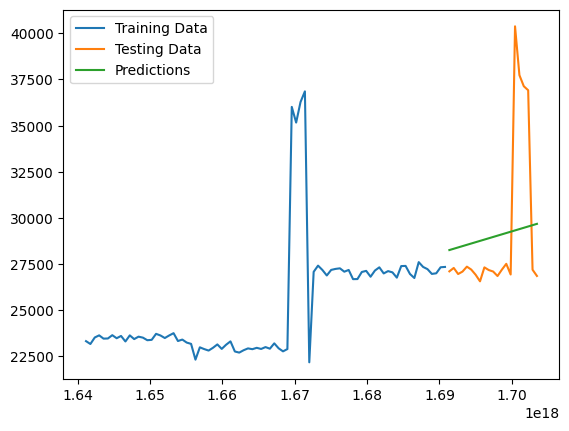

In [22]:
# Linear Regression
from sklearn.linear_model import LinearRegression

linear_s1 = ts_store1.copy()
linear_s1 = linear_s1.reset_index()

linear_s1['Weekly'] = pd.to_datetime(linear_s1['Weekly']).astype(int)

t = int(len(linear_s1)*0.8)

# Train and Test Data
train_data = linear_s1.iloc[:t]
test_data = linear_s1.iloc[t:]

model = LinearRegression()

model.fit(train_data[['Weekly']], train_data['Sales'])

pred = model.predict(test_data[['Weekly']])

# Visualize Data
plt.plot(train_data['Weekly'], train_data['Sales'], label='Training Data')
plt.plot(test_data['Weekly'], test_data['Sales'], label='Testing Data')
plt.plot(test_data['Weekly'], pred, label='Predictions')
plt.legend()
plt.show()

* Una manera de cuantificar la precision de nuestro regresion lineal es calcular la media absoluta de los errores y la media de los errores cuadraticos. La segunda penaliza mas según el tamaño del error por lo que el valor tiende a hacer mayor. Acá podemos ver para MAE un valor relativamente bajo considerando el seasonality. 

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Measure Performance using Mean Absolute Error
mae = mean_absolute_error(test_data['Sales'], pred)
print("MAE:", mae.round(0))
# Measure Performance using Mean Squared Error
mse = mean_squared_error(test_data['Sales'], pred)
print("MSE:", mse.round(0))

MAE: 3067.0
MSE: 17221268.0


In [24]:
# Forecast Next 3 Months
from datetime import datetime, timedelta

linear_s1['Weekly'] = pd.to_datetime(linear_s1['Weekly'], unit='ns')
last_date = linear_s1['Weekly'].max()

next_weeks = pd.DataFrame({'Weekly': [last_date + timedelta(weeks=1),
                                      last_date + timedelta(weeks=2),
                                      last_date + timedelta(weeks=3),
                                      last_date + timedelta(weeks=4),
                                      last_date + timedelta(weeks=5),
                                      last_date + timedelta(weeks=6),
                                      last_date + timedelta(weeks=7),
                                      last_date + timedelta(weeks=8),
                                      last_date + timedelta(weeks=9),
                                      last_date + timedelta(weeks=10),
                                      last_date + timedelta(weeks=11),
                                      last_date + timedelta(weeks=12)]})

next_weeks['Sales'] = model.predict(next_weeks[['Weekly']].astype(int))

print(next_weeks['Sales'].sum().round())

361632.0


#### **Analyzing data from Store 2**

In [39]:
store2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1000 to 1999
Columns: 107 entries, Scode to 2023-12-25 00:00:00
dtypes: float64(1), int64(104), object(2)
memory usage: 843.8+ KB


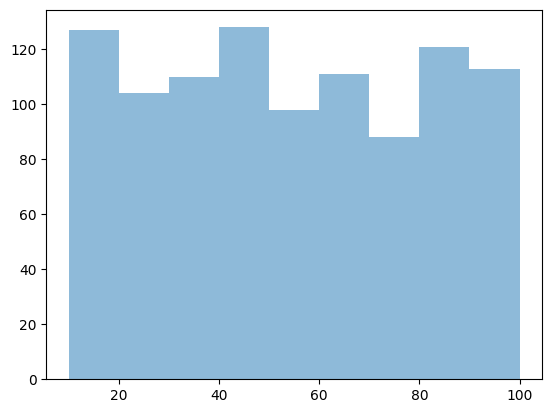

In [42]:
s2_price = store2['Price']
#s2_price.describe()

# Distribution of prices
s2_price = s2_price.to_frame()
s2_price_sorted = s2_price.sort_values('Price')

plt.hist(s2_price_sorted, bins=np.arange(10,110,10), alpha=0.5)
plt.show()

##### Observe some stats by each SKU before change outliers by mean

In [59]:
# Grouping by SKUs
data_skus2 = store2.drop(['Price'], axis=1)
data_skus2_sum = data_skus2.groupby(['Scode', 'Pcode']).agg('sum')

# get stats for each SKUs
b_stats_skus2 = data_skus2_sum.apply(calculate_stats, axis=1).round(1)

# Print stats
print('-----------------------------------------------------------------------------------------')
print('The top 3 SKUs with highest week sales:') 
print(b_stats_skus2.sort_values('max', ascending=False).head(3))
print('-----------------------------------------------------------------------------------------')
print('The top 3 SKUs with lowest week sales:') 
print(b_stats_skus2.sort_values('min', ascending=True).head(3))
print('-----------------------------------------------------------------------------------------')
print('The top 3 SKUs with highest std:') 
print(b_stats_skus2.sort_values('std', ascending=False).head(3))
print('-----------------------------------------------------------------------------------------')
print('The top 3 SKUs with lowest std:') 
print(b_stats_skus2.sort_values('std', ascending=True).head(3))
print('-----------------------------------------------------------------------------------------')
print('The top 3 SKUs with highest mean:') 
print(b_stats_skus2.sort_values('mean', ascending=False).head(3))
print('-----------------------------------------------------------------------------------------')
print('The top 3 SKUs with lowest mean:') 
print(b_stats_skus2.sort_values('mean', ascending=True).head(3))
print('-----------------------------------------------------------------------------------------')

-----------------------------------------------------------------------------------------
The top 3 SKUs with highest week sales:
                mean    std  min     max
Scode  Pcode                            
Store2 SKU666  152.5  680.3  0.0  6605.0
       SKU212  141.7  643.2  0.0  6243.0
       SKU718  170.6  652.3  3.0  6003.0
-----------------------------------------------------------------------------------------
The top 3 SKUs with lowest week sales:
                mean    std  min     max
Scode  Pcode                            
Store2 SKU861   62.8   74.6  0.0   526.0
       SKU488   76.7  146.8  0.0  1256.0
       SKU811  124.3  323.3  0.0  1961.0
-----------------------------------------------------------------------------------------
The top 3 SKUs with highest std:
                mean    std  min     max
Scode  Pcode                            
Store2 SKU494  218.9  830.3  0.0  5859.0
       SKU666  152.5  680.3  0.0  6605.0
       SKU649  189.0  679.4  0.0  5203.0
---

<ipython-input-60-f1be76fb734e>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_2_skus_agg = data_skus2_melted.groupby('Weekly').agg('sum')


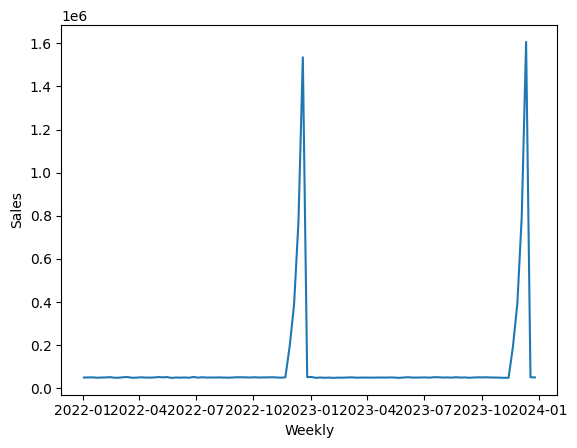

In [60]:
data_skus2_sum = data_skus2_sum.reset_index()
data_skus2_temp = data_skus2_sum.drop('Pcode', axis=1)
data_skus2_melted = pd.melt(data_skus2_temp, id_vars='Scode', var_name='Weekly', value_name='Sales')
#print(data_skus2_melted)


#data_2_skus = data_skus2_melted.drop('Pcode', axis=1)
data_2_skus_agg = data_skus2_melted.groupby('Weekly').agg('sum')
data_2_skus_agg = data_2_skus_agg.reset_index()
#print(data_2_skus_agg)

# Visualize Data
sns.lineplot(x='Weekly', y='Sales', data=data_2_skus_agg)
plt.show()

In [61]:
data_skus2_sum = data_skus2_sum.set_index(['Scode', 'Pcode'])
columns_skus2 = data_skus2_sum.columns

data_skus2_adj = data_skus2_sum.apply(lambda row: replace_outliers(row, columns_skus2, 0.22), axis=1)

a_stats_skus2 = data_skus2_adj.apply(calculate_stats, axis=1).round(1)

# Print stats
print('-----------------------------------------------------------------------------------------')
print('The top 3 SKUs with highest week sales:') 
print(a_stats_skus2.sort_values('max', ascending=False).head(3))
print('-----------------------------------------------------------------------------------------')
print('The top 3 SKUs with lowest week sales:') 
print(a_stats_skus2.sort_values('min', ascending=True).head(3))
print('-----------------------------------------------------------------------------------------')
print('The top 3 SKUs with highest std:') 
print(a_stats_skus2.sort_values('std', ascending=False).head(3))
print('-----------------------------------------------------------------------------------------')
print('The top 3 SKUs with lowest std:') 
print(a_stats_skus2.sort_values('std', ascending=True).head(3))
print('-----------------------------------------------------------------------------------------')
print('The top 3 SKUs with highest mean:') 
print(a_stats_skus2.sort_values('mean', ascending=False).head(3))
print('-----------------------------------------------------------------------------------------')
print('The top 3 SKUs with lowest mean:') 
print(a_stats_skus2.sort_values('mean', ascending=True).head(3))
print('-----------------------------------------------------------------------------------------')

-----------------------------------------------------------------------------------------
The top 3 SKUs with highest week sales:
                mean   std   min    max
Scode  Pcode                           
Store2 SKU666   68.5  55.4   4.0  302.0
       SKU27   125.3  59.3  43.0  285.0
       SKU348  111.9  54.2  38.0  283.0
-----------------------------------------------------------------------------------------
The top 3 SKUs with lowest week sales:
               mean   std  min    max
Scode  Pcode                         
Store2 SKU212  59.2  45.7  1.0  277.0
       SKU666  68.5  55.4  4.0  302.0
       SKU964  61.4  44.7  5.0  268.0
-----------------------------------------------------------------------------------------
The top 3 SKUs with highest std:
                mean   std   min    max
Scode  Pcode                           
Store2 SKU494  121.2  73.4  37.0  266.0
       SKU649  126.8  62.3  40.0  277.0
       SKU27   125.3  59.3  43.0  285.0
----------------------------

<ipython-input-62-06b37a4e6bf8>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_2_skus_agg = data_skus2_melted_adj.groupby('Weekly').agg('sum')


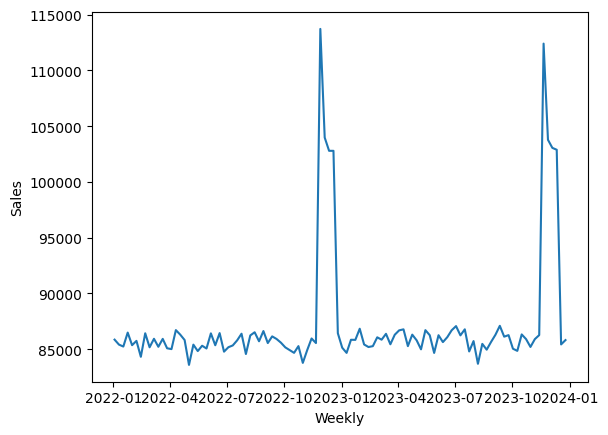

In [62]:
data_skus2_adj = data_skus2_adj.reset_index()
data_skus2_adj_temp = data_skus2_adj.drop('Pcode', axis=1)

data_skus2_melted_adj = pd.melt(data_skus2_adj_temp, id_vars='Scode', var_name='Weekly', value_name='Sales')

#data_2_skus = data_skus2_melted.drop('Pcode', axis=1)
data_2_skus_agg = data_skus2_melted_adj.groupby('Weekly').agg('sum')
data_2_skus_agg = data_2_skus_agg.reset_index()
#print(data_2_skus_agg)

# Visualize data
sns.lineplot(data_2_skus_agg, x='Weekly', y='Sales')
plt.show()

                Sales
Weekly               
2022-01-03   85851.03
2022-01-10   85406.37
2022-01-17   85231.62
2022-01-24   86482.59
2022-01-31   85353.47
...               ...
2023-11-27  103772.92
2023-12-04  103048.94
2023-12-11  102880.09
2023-12-18   85421.14
2023-12-25   85811.12

[104 rows x 1 columns]


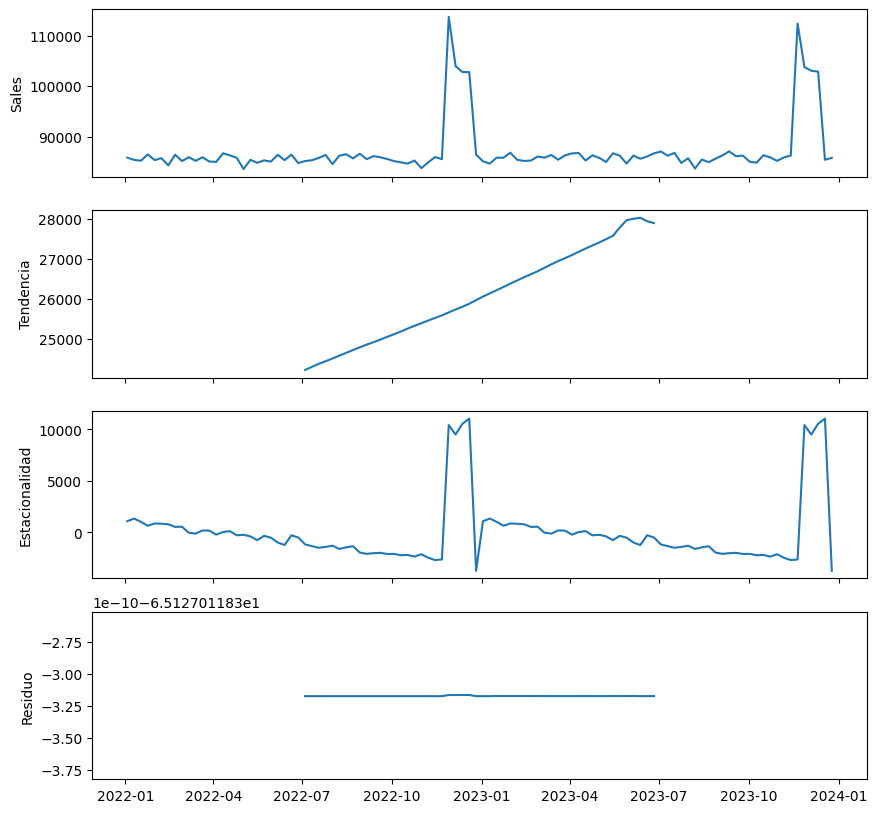

In [63]:
# Review of seasonality, cyclicality and trend of the general data of store 1 through a decomposition of the time series ... 
ts_store2 = data_2_skus_agg.copy()

ts_store2 = ts_store2.set_index('Weekly').round(2)
print(ts_store2)

# Classic Descomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(ts_store1, model='additive')

fig, ax = plt.subplots(nrows=4, figsize=(10,10), sharex=True)
ax[0].plot(ts_store2)
ax[0].set_ylabel('Sales')
ax[1].plot(decomp.trend)
ax[1].set_ylabel('Tendencia')
ax[2].plot(decomp.seasonal)
ax[2].set_ylabel('Estacionalidad')
ax[3].plot(decomp.resid)
ax[3].set_ylabel('Residuo')
plt.show()

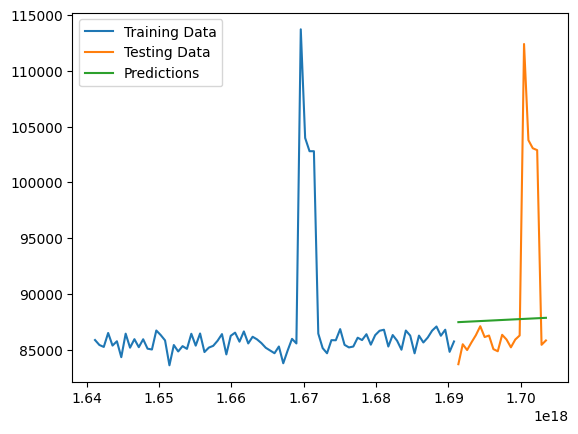

In [64]:
# Linear Regression
from sklearn.linear_model import LinearRegression

linear_s2 = ts_store2.copy()
linear_s2 = linear_s2.reset_index()

linear_s2['Weekly'] = pd.to_datetime(linear_s2['Weekly']).astype(int)

t = int(len(linear_s2)*0.8)

# Train and Test Data
train_data_2 = linear_s2.iloc[:t]
test_data_2 = linear_s2.iloc[t:]

model = LinearRegression()

model.fit(train_data_2[['Weekly']], train_data_2['Sales'])

pred = model.predict(test_data_2[['Weekly']])

# Visualize Data
plt.plot(train_data_2['Weekly'], train_data_2['Sales'], label='Training Data')
plt.plot(test_data_2['Weekly'], test_data_2['Sales'], label='Testing Data')
plt.plot(test_data_2['Weekly'], pred, label='Predictions')
plt.legend()
plt.show()

In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Measure Performance using Mean Absolute Error
mae_2 = mean_absolute_error(test_data_2['Sales'], pred)
print("MAE:", mae_2.round(0))
# Measure Performance using Mean Squared Error
mse_2 = mean_squared_error(test_data_2['Sales'], pred)
print("MSE:", mse_2.round(0))

MAE: 4969.0
MSE: 66621724.0


In [66]:
# Forecast Next 3 Months
from datetime import datetime, timedelta

linear_s2['Weekly'] = pd.to_datetime(linear_s2['Weekly'], unit='ns')
last_date = linear_s2['Weekly'].max()

next_weeks = pd.DataFrame({'Weekly': [last_date + timedelta(weeks=1),
                                      last_date + timedelta(weeks=2),
                                      last_date + timedelta(weeks=3),
                                      last_date + timedelta(weeks=4),
                                      last_date + timedelta(weeks=5),
                                      last_date + timedelta(weeks=6),
                                      last_date + timedelta(weeks=7),
                                      last_date + timedelta(weeks=8),
                                      last_date + timedelta(weeks=9),
                                      last_date + timedelta(weeks=10),
                                      last_date + timedelta(weeks=11),
                                      last_date + timedelta(weeks=12)]})

next_weeks['Sales'] = model.predict(next_weeks[['Weekly']].astype(int))

print(next_weeks['Sales'].sum().round())

1055620.0


In [25]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

# Leer datos
data = pd.read_csv("ventas_semanales.csv")

# Dividir en entrenamiento y prueba
train = data[:-4]
test = data[-4:]

# Separar variables independientes y dependientes
train_X = train[["Semana"]]
train_y = train["Ventas"]
test_X = test[["Semana"]]
test_y = test["Ventas"]

# Crear matriz de entrenamiento y prueba
dtrain = xgb.DMatrix(train_X, label=train_y)
dtest = xgb.DMatrix(test_X, label=test_y)

# Definir parámetros del modelo
params = {
    "max_depth": 3,
    "eta": 0.1,
    "subsample": 0.7,
    "objective": "reg:squarederror",
    "eval_metric": "mae"
}

# Entrenar modelo
model = xgb.train(params, dtrain)

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(dtest)

# Calcular el error absoluto medio de las predicciones
mae = mean_absolute_error(test_y, predictions)
print("MAE:", mae)

FileNotFoundError: ignored

###**Optimización de Precio**
 

In [33]:
SKU321 = data[data['Pcode'] == 'SKU321'] 
SKU321.head(15)

,Scode,Pcode,Price,2022-01-03 00:00:00,2022-01-10 00:00:00,2022-01-17 00:00:00,2022-01-24 00:00:00,2022-01-31 00:00:00,2022-02-07 00:00:00,2022-02-14 00:00:00,...,2023-10-23 00:00:00,2023-10-30 00:00:00,2023-11-06 00:00:00,2023-11-13 00:00:00,2023-11-20 00:00:00,2023-11-27 00:00:00,2023-12-04 00:00:00,2023-12-11 00:00:00,2023-12-18 00:00:00,2023-12-25 00:00:00
320,Store1,SKU321,91.0,3,6,8,5,3,3,3,...,31,25,5,9,54,73,95,201,35,1
1320,Store2,SKU321,64.0,16,9,91,93,1,80,17,...,66,83,68,12,155,343,492,1216,29,24
2012,Store3,SKU321,41.0,97,78,88,56,87,57,66,...,73,73,100,56,228,402,880,1260,51,91
2093,Store3,SKU321,94.0,81,76,93,53,57,67,91,...,75,69,79,62,271,677,1752,1801,64,86
2212,Store3,SKU321,67.0,78,61,79,55,80,98,73,...,65,79,86,61,286,495,1391,1882,73,54
2280,Store3,SKU321,87.0,65,67,93,53,84,79,90,...,87,74,99,60,207,459,507,980,65,67
2562,Store3,SKU321,10.0,64,65,64,72,68,75,76,...,88,96,76,92,100,228,533,1480,70,61
2595,Store3,SKU321,30.0,56,54,50,54,62,76,73,...,65,79,85,80,198,520,1495,2770,58,86
2834,Store3,SKU321,43.0,87,60,60,92,54,68,78,...,65,64,73,53,253,265,793,1284,62,59
2883,Store3,SKU321,87.0,51,99,59,66,95,66,58,...,100,79,51,64,147,395,683,1717,63,57


In [35]:
SKU321_flt = SKU321.loc[:, ~SKU321.columns.isin(['Scode', 'Pcode'])]

'''
# Calculating mean sales weekly by each price
SKU321_melted = SKU321_flt.melt(id_vars=['Price'], var_name='Weekly', value_name='Sales')

SKU321_mean = SKU321_melted.groupby('Price')['Sales'].mean().reset_index()
print(SKU321_mean)

# Calculating mean sales weekly by each price but using percentiles to avoid outliers
p10, p90 = SKU321_melted['Sales'].quantile([0.10, 0.90])
SKU321_melted['Sales_Acot'] = SKU321_melted['Sales'].clip(p10,p90)
SKU321_mean_clip = SKU321_melted.groupby('Price')['Sales_Acot'].mean().reset_index()
print(SKU321_mean_clip)
'''

'''
store1_melted = pd.melt(store1_flt, id_vars=["Pcode"], var_name="dates", value_name="venta")
# df_melted.head(15)
store1_pivoted = store1_melted.pivot(index="dates", columns="Pcode", values="venta")
store1_pivoted.head()
'''

def media_sin_outliers(row):
    mean = np.mean(row[1:])
    std = np.std(row[1:])
    
    row = row[(row >= mean - 0.5*std) & (row <= mean + 0.5*std)]
    
    return np.mean(row)


SKU321_flt['mean_without_outliers'] = SKU321_flt.apply(media_sin_outliers, axis=1)
SKU321_adj = SKU321_flt[['Price', 'mean_without_outliers']]
SKU321_adj = SKU321_adj.sort_values('Price', ascending=True)
SKU321_adj.head(15)

<ipython-input-35-3c42c2a6db7a>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SKU321_flt['mean_without_outliers'] = SKU321_flt.apply(media_sin_outliers, axis=1)


,Price,mean_without_outliers
2562,10.0,74.350515
2595,30.0,78.262626
2012,41.0,77.520408
2834,43.0,72.298969
2997,44.0,38.020202
1320,64.0,52.864583
2212,67.0,79.969697
2280,87.0,75.319588
2883,87.0,75.333333
320,91.0,14.280000


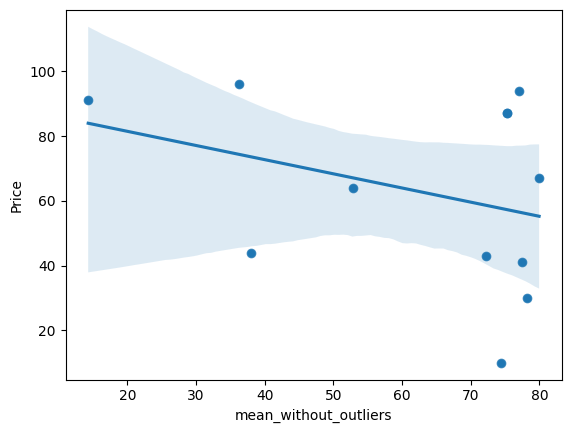

In [36]:
sns.scatterplot(data=SKU321_adj, x='mean_without_outliers', y='Price')
sns.regplot(data=SKU321_adj, x='mean_without_outliers', y='Price')
plt.show()

In [37]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(SKU321_adj['mean_without_outliers'], SKU321_adj['Price'])
print(f'Equation: y = {slope:.2f}x + {intercept:.2f}')

Equation: y = -0.44x + 90.21


#### ***La curva de la demanda es la siguiente Q = P/(-0.44) + 205.02***

* Definimos las siguientes variables: I (Ingreso), P (Precio) & Q (Demanda)

* Se busca maximizar los ingresos por lo que tenemos I = P*Q donde P = -0.44Q + 90.21. 
Sustituyendo tenemos I = (-0.44Q + 90.21)Q , la cual se busca encontrar el valor maximo global esto derivando la funcion I(Q) para obtener D(I(Q)) = -0.88Q + 90.21 e igualamos a 0 para obtener Q que maximiza como resultado Q = 102.3 maximiza las ganancias. La cual sustituimos en P(Q) para obtener nuestro precio optimo P = 45.19  

#### **Pronostico para 3 meses posteriores**

* El precio optimo es de 45.19 y la cantidad demandada para ese precio es de Q = 102,3 con ventas para los próximos 3 meses de 55,475.244

* Si el precio se reduce un 10% a 40.67, la cantidad demandada aumentaria 10% a 112,53 es decir ventas de 4,576.5 semanalmente y para los próximos 3 meses de 54,919.1 (Ya que la elasticidad para estos intervalos es de 1)

* Si el precio se incrementa 10% a 49.70, la cantidad demandada disminuye 11% a 92,07 es decir ventas de 4,575.8 semanalmente y para los próximos 3 meses de 54,910.5 (Ya que la elasticidad para estos intervalos es de 1.1)

#### ***Conclusiones de este ejercico de optimizacion de precios*** 

* En este caso por simplicidad tomamos la media de todo el historico de ventas para los diferentes precios (Cuidando de re-escalar la data para evitar los sesgos por los valores atipicos) pero un factor importante que no sé tomo en cuenta fueron las tendecias y estacionalidades del producto porque casi seguramenta la elasticidad para meses como Noviembre o Diciembre no es la misma que para el resto del año donde en el primero las cantidades demandadas no tienen tanto efecto a variaciones de precio (inelastica) que es meses donde la demanda del mercado por el producto es flat. 

###**Cuantifica la oportunidad economica**

1.- Cuanto dinero se esté mermando (perdiendo) al no contar con una herramienta de optimización de precios?

* No conocer la curva de la demanda y elasticidad implica que no estemos maximizando nuestras ventas lo que conlleva a una perdidad en el negocio. Hagamos esto con un ejemplo para ser concientes del impacto entonces Si def. E como la elasticidad entonces para E > 1 tendríamos una curva de la demanda elastica, ahora en un ejemplo de E = 1.7 nos dice que si aumentaramos el precio 10% disminurian nuestra cantidad demandada hasta un 17% esto es un impacto fuerte al negocio.

2.- Que tan comodo te sientes de cerrar la brecha entre la oportunidad económica y usar tu solución de optimizacion de precios?

* Sin duda es un reto porque involucran muchas tareas por hacer desde establecer pipelines que alimenten de info relevante en tiempo real, metodos para el procesamiento de la misma y la creación de un modelo que se ajuste a los objetivos entre otros pero gran parte de ese proceso me siento comodo para realizar lo. 

3.- Cuales son algunas de las consideraciones de implementacion que tomarías en cuenta previo a lanzar la solución en la nube?

* De llevar procedimientos adecuados para prevalecer la seguridad y privacidad de la información. Y en temas de infraestructura contar con las herraminetas adecuadas para el almacenamiento, procesamiento, ejecución del modelo y por supuesto escalabilidad ya que cada mes se integran mas productos al portafolio para los cuales requieren llevar un procedimiento para siempre intentar tener los precios optimos. 

* Optimización de procesos para el procesamiento de informacion.

4.- Una vez implementada la solución. Que proceso establecerias para medir el desempeño y mejorar la preción de tu solución a través del timepo?

* Monitoreo con el objetivo de detectar problemas de calibración, de que la data de retroalimentación al modelo sea la adecuada para evitar sesgos y factores externos que provoquen alta/baja demanda.  

* Mantener restricciones o filtros de seguridad para manter los precios siempre en un rango de precios que siempre haga sentido.